# Stanford CME 241 (Winter 2024) - Assignment 7

**Due: Mar 4 @ 11:59pm Pacific Time on Gradescope (after the exam).**

Assignment instructions:
- **Solve all 3 questions.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):*

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):*
- Tiankai Yan
- Jingruo Sun
- Xiaoli Yang

## Imports

In [11]:
# Clone the rl-book repository
!git clone https://github.com/TikhonJelvis/rl-book.git

# Change the working directory to the rl-book directory
%cd rl-book

# Move to the branch with proper installation requirements
!git checkout notebook
!pip install -r notebooks/notebook-requirements.txt
!pip install -e .

Cloning into 'rl-book'...
remote: Enumerating objects: 7272, done.
remote: Counting objects: 100% (999/999), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 7272 (delta 620), reused 922 (delta 600), pack-reused 6273
Receiving objects: 100% (7272/7272), 16.50 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (4372/4372), done.
/content/rl-book/rl-book/rl-book
Branch 'notebook' set up to track remote branch 'notebook' from 'origin'.
Switched to a new branch 'notebook'
  Using cached more_itertools-8.4.0-py3-none-any.whl (43 kB)
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.7.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.1

## Question 1
In the following question, we explore the connection between TD and MC
algorithms.

1.  Implement the TD($\lambda$) Prediction algorithm from scratch in
    Python code. First do it for the Tabular case, then do it for the
    case of Function Approximation.

2.  Prove that the MC Error can be written as the sum of discounted TD
    errors, i.e.,
    $$G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot (R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u))$$
    The goal here is for you to practice formal proof-writing of these
    types of simple yet important identities. So aim to work this out
    from scratch rather than treating this as a special case of a more
    general result proved in class or in the textbook.

3.  Test your above implementation of TD($\lambda$) Prediction algorithm
    by comparing the Value Function of an MRP you have previously
    developed (or worked with) as obtained by Policy Evaluation (DP)
    algorithm, as obtained by MC, as obtained by TD, and as obtained by
    your TD($\lambda$) implementation. Plot graphs of convergence for
    different values of $\lambda$.

4.  Extend `RandomWalkMRP` (in
    [rl/chapter10/random_walk_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter10/random_walk_mrp.py))
    to `RandomWalkMRP2D` which is a random walk in 2-D with states
    $\{i, j) | 0 \leq i \leq B_1, 0 \leq j \leq B_2\}$ with terminal
    states as $(0, j)$ and $(B_1, j)$ for all $j$, $(i, 0)$ and
    $(i, B_2)$ for all $i$, and with reward of 0 for all $(0, j)$ and
    for all $(i, 0)$, reward of 1 for all $(B_1, j)$ and for all
    $(i, B_2)$, and with discrete probabilities of 4 movements - UP,
    DOWN, LEFT, RIGHT from any non-terminal state. Analyze the
    convergence of MC and TD on this `RandomWalkMRP2D` much like how we
    analyzed it for `RandomWalkMRP`, along with plots of similar graphs.

Part 1

In [ ]:
import numpy as np

# def td_lambda(env, policy, num_episodes, discount_factor=1.0, alpha=0.5, lambda_factor=0.5):
#     V = np.zeros(env.nS)

#     for i_episode in range(num_episodes):
#         state = env.reset()
#         eligibility_trace = np.zeros(env.nS)

#         for t in range(100):
#             action = policy(state)
#             step_results = env.step(action)
#             next_state, reward, done = step_results[:3]

#             # Print the type of next_state for debugging
#             print(f"Current state: {state}, Next state: {next_state}")

#             if isinstance(next_state, tuple):
#                 next_state = next_state[0]

#             delta = reward + discount_factor * V[next_state] - V[state]
#             eligibility_trace[state] += 1.0

#             V += alpha * delta * eligibility_trace
#             eligibility_trace *= discount_factor * lambda_factor

#             if done:
#                 break

#             state = next_state

#     return V

def td_lambda(env, policy, num_episodes, discount_factor=1.0, alpha=0.5, lambda_factor=0.5):
    """
    TD(λ) algorithm for a given environment and policy.

    Args:
    env: OpenAI Gym environment.
    policy: A function that maps states to actions.
    num_episodes: Number of episodes to run for.
    discount_factor: Gamma discount factor.
    alpha: Step size (learning rate).
    lambda_factor: λ factor for TD(λ).

    Returns:
    V: The estimated value function.
    """
    # Initialize the value function to zero for all states
    V = np.zeros(env.observation_space.n)

    for episode in range(num_episodes):
        state = env.reset()
        eligibility_trace = np.zeros(env.observation_space.n)

        done = False
        while not done:
            action = policy(state)
            next_state, reward, done, _, _ = env.step(action)

            # TD Error
            td_error = reward + discount_factor * V[next_state] - V[state[0]]

            # Update eligibility trace
            eligibility_trace[state[0]] += 1

            # Update value function for all states
            V += alpha * td_error * eligibility_trace

            # Decay eligibility trace
            eligibility_trace *= discount_factor * lambda_factor

            state = next_state

    return V


def td_lambda_fa(env, policy, num_episodes, discount_factor=1.0, alpha=0.5, lambda_factor=0.5):
    # Initialize the weight vector to zero
    theta = np.zeros(env.nS)

    for i_episode in range(num_episodes):
        state = env.reset()
        eligibility_trace = np.zeros(env.nS)

        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)

            # Compute the value function using the linear function approximator
            V = theta[state]
            V_next = theta[next_state]

            delta = reward + discount_factor * V_next - V
            eligibility_trace[state] += 1.0

            theta += alpha * delta * eligibility_trace
            eligibility_trace *= discount_factor * lambda_factor

            if done:
                break

            state = next_state

    return theta

Part 2

We prove this problem by induction.

The return $G_t$ is defined as the sum of discounted rewards from that state until the terminal state, so it can be written as:

$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... + \gamma^{T-t-1} R_{T}.
$$

Base case: when $u = T-1$, the sum of discounted TD error is:

$$
\gamma^{T-t-1}\cdot (R_{T} + \gamma V(S_T) - V(S_{T-1})) = \gamma^{T-t-1}\cdot (R_{T} - V(S_{T-1}))
$$
which matches the last term of the expanded MC error and the statement holds true.

Induction steps: assume this relationship holds for $u = k$, then we want to prove it also holds for $u = k-1$:

$$
\begin{align}
& \gamma^{T-k-1} \cdot (R_k + \gamma V(S_k) - V(S_{k-1})) + \gamma^{k-t} \cdot (R_{k+1} + \gamma V(S_{k+1}) - V(S_{k})) \nonumber \\
= \ & \gamma^{T-k-1} \cdot R_k + \gamma^{k-t} \cdot R_{k+1} - \gamma^{T-k-1} \cdot V(S_{k-1}). \nonumber
\end{align}
$$

Thus, by applying induction from $u = T-1$ to $u = t$, we sum up all the TD errors, which telescopes to cancel out all intermediate value function terms, leaving us with:

$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot (R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u)).
$$

Part 3

In [ ]:
def policy_evaluation(env, policy, discount_factor=1.0, theta=0.00001):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            v = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return np.array(V)

def mc_prediction(env, policy, num_episodes, discount_factor=1.0):
    returns_sum = np.zeros(env.nS)
    returns_count = np.zeros(env.nS)
    V = np.zeros(env.nS)
    for i_episode in range(num_episodes):
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        states_in_episode = set([tuple(x[:2]) for x in episode])
        for state in states_in_episode:
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[:2] == state)
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
    return V

def td_prediction(env, policy, num_episodes, discount_factor=1.0, alpha=0.5):
    V = np.zeros(env.nS)
    for i_episode in range(num_episodes):
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            V[state] = V[state] + alpha * (reward + discount_factor * V[next_state] - V[state])
            if done:
                break
            state = next_state
    return V

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np

# Define a custom environment class
class CustomFrozenLakeEnv(gym.envs.toy_text.FrozenLakeEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.nS = self.observation_space.n
        self.nA = self.action_space.n

# Create an instance of the custom environment
env = CustomFrozenLakeEnv(is_slippery=False)

# Define a random policy
policy = lambda s: env.action_space.sample()

# Define the number of episodes
num_episodes = 1000

# Define the TD(λ) method for different values of λ
lambdas = np.arange(0, 1.1, 0.1)
V_td_lambda = []
for lambda_factor in lambdas:
    V = td_lambda(env, policy, num_episodes, lambda_factor=lambda_factor)
    V_td_lambda.append(V)

# Run the Policy Evaluation (DP) algorithm
V_dp = policy_evaluation(env, policy)

# Run the Monte Carlo (MC) method
V_mc = mc_prediction(env, policy)

# Run the Temporal Difference (TD) method
V_td = td_prediction(env, policy)

# Compare the value functions
print("DP:", V_dp)
print("MC:", V_mc)
print("TD:", V_td)
for i, lambda_factor in enumerate(lambdas):
    print(f"TD(λ={lambda_factor}):", V_td_lambda[i])

# Plot the convergence of the value functions for different values of λ
for i, lambda_factor in enumerate(lambdas):
    plt.plot(V_td_lambda[i], label=f"λ={lambda_factor}")
plt.legend()
plt.show()

TypeError: 'int' object is not subscriptable

Part 4

First we extend RandomWalkMRP to RandomWalkMRP2D.

We define the transition probabilities and rewards for the 2D random walk. For each non-terminal state, it assigns a probability of 0.25 to moving up, down, left, or right, with a reward of 0. For each terminal state, it assigns a reward of 0 if the state is on the left or bottom edge, and a reward of 1 if the state is on the right or top edge.

In [ ]:
class RandomWalk:
    def __init__(self, num_states=5):
        self.num_states = num_states
        self.states = np.arange(num_states)
        self.start = num_states // 2
        self.terminal_states = [0, num_states - 1]
        self.current_state = self.start

    def step(self):
        # Randomly choose a direction (left or right)
        direction = np.random.choice([-1, 1])
        next_state = self.current_state + direction

        # Check if the next state is a terminal state
        if next_state in self.terminal_states:
            reward = 1 if next_state == self.num_states - 1 else -1
            done = True
        else:
            reward = 0
            done = False

        self.current_state = next_state
        return next_state, reward, done

    def reset(self):
        self.current_state = self.start
        return self.current_state

In [ ]:
from rl.markov_process import FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
from typing import Tuple

# class RandomWalkMRP2D(FiniteMarkovRewardProcess[Tuple[int, int]]):
#     def __init__(self, B1: int, B2: int):
#         self.B1 = B1
#         self.B2 = B2
#         super().__init__(self.get_transition_map())

#     def get_transition_map(self):
#         d: Dict[Tuple[int, int], Categorical[Tuple[Tuple[int, int], float]]] = {}
#         for i in range(self.B1 + 1):
#             for j in range(self.B2 + 1):
#                 if i in {0, self.B1} or j in {0, self.B2}:
#                     reward = 0 if i in {0, self.B1} else 1
#                     d[(i, j)] = None
#                 else:
#                     d[(i, j)] = Categorical({
#                         ((i - 1, j), 0.0): 0.25,
#                         ((i + 1, j), 0.0): 0.25,
#                         ((i, j - 1), 0.0): 0.25,
#                         ((i, j + 1), 0.0): 0.25,
#                     })
#         return d

class RandomWalkMRP2D:
    def __init__(self, B1=5, B2=5):
        self.B1 = B1
        self.B2 = B2
        self.states = [(i, j) for i in range(B1+1) for j in range(B2+1)]
        self.start = (B1 // 2, B2 // 2)
        self.terminal_states = [(i, j) for i in range(B1+1) for j in range(B2+1) if i in [0, B1] or j in [0, B2]]
        self.current_state = self.start

    def step(self):
        # Randomly choose a direction (up, down, left, or right)
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        x, y = self.current_state
        if direction == 'up':
            next_state = (x, min(y+1, self.B2))
        elif direction == 'down':
            next_state = (x, max(y-1, 0))
        elif direction == 'left':
            next_state = (max(x-1, 0), y)
        elif direction == 'right':
            next_state = (min(x+1, self.B1), y)

        # Check if the next state is a terminal state
        if next_state in self.terminal_states:
            reward = 0 if next_state[0] in [0, self.B1] else 1
            done = True
        else:
            reward = 0
            done = False

        self.current_state = next_state
        return next_state, reward, done

    def reset(self):
        self.current_state = self.start
        return self.current_state

Then we analyze the convergence of MC and TD on this RandomWalkMRP2D.

In [ ]:
def mc_prediction(env, num_episodes, discount_factor=1.0):
    returns_sum = np.zeros((env.B1+1, env.B2+1))
    returns_count = np.zeros((env.B1+1, env.B2+1))
    V = np.zeros((env.B1+1, env.B2+1))
    V_all = []
    for i_episode in range(num_episodes):
        state = env.reset()
        episode = []
        for t in range(100):
            next_state, reward, done = env.step()
            episode.append((state, reward))
            if done:
                break
            state = next_state
        G = 0
        for t in reversed(range(len(episode))):
            state, reward = episode[t]
            G = discount_factor * G + reward
            if state not in [x[0] for x in episode[:t]]:
                returns_sum[state] += G
                returns_count[state] += 1
                V[state] = returns_sum[state] / returns_count[state]
        V_all.append(V.copy())
    return V_all

def td_prediction(env, num_episodes, discount_factor=1.0, alpha=0.5):
    V = np.zeros((env.B1+1, env.B2+1))
    V_all = []

    for i_episode in range(num_episodes):
        state = env.reset()
        episode = []
        for t in range(100):
            next_state, reward, done = env.step()
            episode.append((state, reward))
            if done:
                break
            state = next_state

        for t in range(len(episode)):
            state, reward = episode[t]
            if t + 1 < len(episode):
                next_state, _ = episode[t + 1]
                td_target = reward + discount_factor * V[next_state]
            else:
                td_target = reward
            td_error = td_target - V[state]
            V[state] += alpha * td_error

        V_all.append(V.copy())

    return V_all


MC: [array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0.5, 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ]]), array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.66666667, 0.5       , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]]), array([[0.        , 0. 

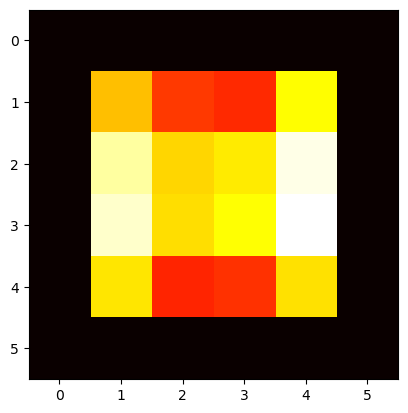

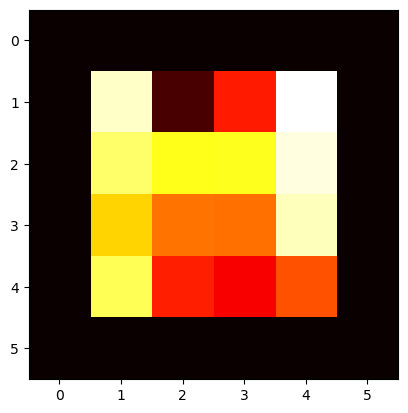

In [ ]:
mrp2d = RandomWalkMRP2D(B1=5, B2=5)

# Run the Monte Carlo (MC) method
V_mc = mc_prediction(mrp2d, num_episodes=1000)

# Run the Temporal Difference (TD) method
V_td = td_prediction(mrp2d, num_episodes=1000)

# Compare the value functions
print("MC:", V_mc)
print("TD:", V_td)

# Plot the value functions
final_V_mc = V_mc[-1]
final_V_td = V_td[-1]

plt.imshow(final_V_mc, cmap='hot', interpolation='nearest')
plt.show()

plt.imshow(final_V_td, cmap='hot', interpolation='nearest')
plt.show()

## Question 2
In this question, we will explore three different algorithms for control
based on MC or TD. Please complete 2 of the following 3 implementations.
For each algorithm, we expect you to test your implementation against
the Optimal Value Function/Optimal Policy obtained by DP on
`SimpleInventoryMDPCap` in
[rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py).
Then, generalize to MC Control with Function approximation and test your
implementation against the Optimal Value Function/Optimal Policy
obtained by ADP on `AssetAllocDiscrete` in
[rl/chapter7/asset_alloc_discrete.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter7/asset_alloc_discrete.py).

1.  Implement Tabular Monte-Carlo Control algorithm in Python with GLIE
    implemented as $\epsilon = \frac 1 k$ for episode number $k$ and
    initial state of each episode sampled uniformly from the state
    space.

2.  Implement Tabular SARSA algorithm in Python with GLIE and a
    parameterized trajectory of decreasing step sizes.

3.  Implement Tabular Q-Learning algorithm in Python with infinite
    exploration of all (state, action) pairs and with a parameterized
    trajectory of decreasing step sizes.

### Solution
In the following sections, we implemented #1 and #3 and tested against corresponding OVF and OP provided in the rl-book. We also generalize to MC Control with Function Approximation cases.

#### Implementation 3: Implement Tabular Q-Learning algorithm in Python with infinite exploration of all (state, action) pairs and with a parameterized trajectory of decreasing step sizes.

In [ ]:
import numpy as np
from rl.chapter3.simple_inventory_mdp_cap import SimpleInventoryMDPCap
from typing import Mapping
from operator import itemgetter
from scipy.stats import rv_discrete

def get_epsilon_greedy_action(nt_state, q, epsilon):
    action_values = q[nt_state]
    greedy_action = max(action_values.items(), key=itemgetter(1))[0]
    action_probabilities = {a: epsilon / len(action_values) + (1 - epsilon if a == greedy_action else 0.) for a in action_values}
    return rv_discrete(values=(list(action_probabilities.keys()), list(action_probabilities.values()))).rvs()

def tabular_q_learning(env, num_episodes, alpha, gamma=0.9, epsilon=0.1):
    Q = {state: {action: 0.0 for action in env.actions(state)} for state in env.non_terminal_states}

    for episode in range(num_episodes):
        state = np.random.choice(env.non_terminal_states)
        while state in env.non_terminal_states:
            action = get_epsilon_greedy_action(state, Q, epsilon)
            print(env.step(state, action))
            next_state, reward = env.step(state, action).sample()
            next_action = max(Q[next_state], key=Q[next_state].get)
            Q[state][action] += alpha(episode) * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state = next_state
    return Q


env = SimpleInventoryMDPCap(capacity=2, poisson_lambda=1.0, holding_cost=1.0, stockout_cost=10.0)
alpha = lambda n: 1.0 / (n + 1)
Q = tabular_q_learning(env, num_episodes=10, alpha=alpha)


Streaming output truncated to the last 5000 lines.
{(NonTerminal(state=InventoryState(on_hand=0, on_order=1)), -10.0): 1.0}
{(NonTerminal(state=InventoryState(on_hand=1, on_order=1)), -0.0): 0.3678794411714424, (NonTerminal(state=InventoryState(on_hand=0, on_order=1)), -3.6787944117144233): 0.6321205588285577}
{(NonTerminal(state=InventoryState(on_hand=1, on_order=1)), -0.0): 0.3678794411714424, (NonTerminal(state=InventoryState(on_hand=0, on_order=1)), -3.6787944117144233): 0.6321205588285577}
{(NonTerminal(state=InventoryState(on_hand=1, on_order=1)), -0.0): 0.3678794411714424, (NonTerminal(state=InventoryState(on_hand=0, on_order=1)), -3.6787944117144233): 0.6321205588285577}
{(NonTerminal(state=InventoryState(on_hand=1, on_order=1)), -0.0): 0.3678794411714424, (NonTerminal(state=InventoryState(on_hand=0, on_order=1)), -3.6787944117144233): 0.6321205588285577}
{(NonTerminal(state=InventoryState(on_hand=1, on_order=1)), -0.0): 0.3678794411714424, (NonTerminal(state=InventoryState(on_

In [ ]:
from rl.chapter7.asset_alloc_discrete import AssetAllocDiscrete
from rl.function_approx import Tabular, AdamGradient, LinearFunctionApprox

def mc_control_with_fa(env, num_episodes, alpha, gamma=0.9, epsilon=0.1):
    fa = LinearFunctionApprox.create(
        feature_functions=env.state_action_features,
        regularization_coeff=0.0,
        learning_rate=AdamGradient(0.1)
    )

    for episode in range(num_episodes):
        trajectory = []
        state = env.init_state_gen()
        while not env.is_terminal(state):
            action_values = {action: fa.evaluate([(state, action)])[0] for action in env.actions(state)}
            action = get_epsilon_greedy_action(state, {state: action_values}, epsilon)
            next_state, reward = env.state_reward_gen(state, action)
            trajectory.append((state, action, reward))
            state = next_state

        returns = 0
        for state, action, reward in reversed(trajectory):
            returns = gamma * returns + reward
            fa = fa.update([(state, action)], returns)

    return fa

# Example usage
env = AssetAllocDiscrete(
    risky_return_distributions=[
        lambda: np.random.normal(0.07, 0.15),
        lambda: np.random.normal(0.02, 0.08),
    ],
    riskless_returns=0.03,
    utility_function=np.log,
    periods=1,
    risk_aversion=1.0,
    discount_rate=0.95,
    price_ratio=2.0,
    feature_functions=env.state_action_features
)
alpha = lambda n: 1.0 / (n + 1)
fa = mc_control_with_fa(env, num_episodes=10000, alpha=alpha)

#### Implementation 1: Tabular Monte-Carlo Control algorithm in Python with GLIE implemented as epsilon = 1/k for episode number k and initial state of each episode sampled uniformly from the state space.

In [14]:
import numpy as np
from rl.dynamic_programming import value_iteration_result
from rl.chapter3.simple_inventory_mdp_cap import SimpleInventoryMDPCap
from collections import defaultdict
from typing import Tuple, Dict

def tabular_mc_control_glie(
    mdp: SimpleInventoryMDPCap,
    num_episodes: int,
    gamma: float = 0.9
) -> Tuple[Dict[Tuple[int, int], float], Dict[Tuple[int, int], int]]:
    Q = defaultdict(float)
    returns = defaultdict(list)
    policy = {}

    for k in range(1, num_episodes + 1):
        epsilon = 1 / k
        state = mdp.non_terminal_states[np.random.choice(len(mdp.non_terminal_states))]
        episode = []
        while isinstance(state, type(mdp.non_terminal_states)):
            action_probs = [epsilon / len(mdp.actions(state))] * len(mdp.actions(state))
            best_action = max(mdp.actions(state), key=lambda a: Q[(state, a)])
            action_probs[mdp.actions(state).index(best_action)] += 1 - epsilon
            action = np.random.choice(mdp.actions(state), p=action_probs)
            next_state, reward = mdp.step(state, action)
            episode.append((state, action, reward))
            state = next_state

        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if not any((state, action) == (x[0], x[1]) for x in episode[:t]):
                returns[(state, action)].append(G)
                Q[(state, action)] = np.mean(returns[(state, action)])
                best_action = max(mdp.actions(state), key=lambda a: Q[(state, a)])
                policy[state] = best_action

    return Q, policy

if __name__ == "__main__":
    capacity = 5
    poisson_lambda = 2
    holding_cost = 1.0
    stockout_cost = 1.0

    si_mdp = SimpleInventoryMDPCap(capacity, poisson_lambda, holding_cost, stockout_cost)
    optimal_vf_dp, optimal_policy_dp = value_iteration_result(si_mdp, gamma=0.9)

    num_episodes = 10000
    Q_mc, policy_mc = tabular_mc_control_glie(si_mdp, num_episodes, gamma=0.9)

    print("Optimal Value Function (DP):")
    for state in si_mdp.non_terminal_states:
        print(f"State {state}: {optimal_vf_dp[state]}")

    print("\nOptimal Policy (DP):")
    print(optimal_policy_dp)
        # print(f"State {state}: {optimal_policy_dp[state]}")

    print("\nApproximate Value Function (MC Control):")
    for state in si_mdp.non_terminal_states:
        print(f"State {state}: {max(Q_mc[(state, a)] for a in si_mdp.actions(state))}")

    print("\nApproximate Policy (MC Control):")
    for state in si_mdp.non_terminal_states:
        print(f"State {state}: {policy_mc.get(state, 'N/A')}")


Optimal Value Function (DP):
State NonTerminal(state=InventoryState(on_hand=0, on_order=0)): -10.798227167561377
State NonTerminal(state=InventoryState(on_hand=0, on_order=1)): -9.967871520024426
State NonTerminal(state=InventoryState(on_hand=0, on_order=2)): -9.77581714676306
State NonTerminal(state=InventoryState(on_hand=0, on_order=3)): -10.318980391710667
State NonTerminal(state=InventoryState(on_hand=0, on_order=4)): -11.137411685598133
State NonTerminal(state=InventoryState(on_hand=0, on_order=5)): -12.362799851195028
State NonTerminal(state=InventoryState(on_hand=1, on_order=0)): -10.967871520024426
State NonTerminal(state=InventoryState(on_hand=1, on_order=1)): -10.77581714676306
State NonTerminal(state=InventoryState(on_hand=1, on_order=2)): -11.318980391710669
State NonTerminal(state=InventoryState(on_hand=1, on_order=3)): -12.137411685598135
State NonTerminal(state=InventoryState(on_hand=1, on_order=4)): -13.362799851195025
State NonTerminal(state=InventoryState(on_hand=2, o

In [ ]:
import numpy as np
from rl.chapter7.asset_alloc_discrete import AssetAllocDiscrete
from rl.function_approx import DNNSpec, AdamGradient, LinearFunctionApprox
from typing import Iterable, Tuple, Callable, Sequence
from rl.approximate_dynamic_programming import QValueFunctionApprox
from rl.distribution import Choose, Gaussian

def mc_control_with_fa(
    mdp: AssetAllocDiscrete,
    num_episodes: int,
    gamma: float,
    epsilon_decay: Callable[[int], float]
) -> LinearFunctionApprox:
    feature_functions: Sequence[Callable[[Tuple[float, float]], float]] = [
        lambda _: 1.0,
        lambda x: x[0],
        lambda x: x[0] ** 2,
        lambda x: x[1],
        lambda x: x[1] ** 2,
        lambda x: x[0] * x[1]
    ]
    q_approx = LinearFunctionApprox.create(feature_functions)

    for k in range(1, num_episodes + 1):
        epsilon = epsilon_decay(k)
        state = mdp.initial_wealth_distribution.sample()
        episode = []
        while not mdp.is_terminal(state):
            actions = mdp.actions(state)
            action_distribution = Choose(
                [(a, epsilon / len(actions)) for a in actions]
            )
            action_distribution = action_distribution.add_prob(
                max(actions, key=lambda a: q_approx((state, a))),
                1 - epsilon
            )
            action = action_distribution.sample()
            next_state, reward = mdp.step(state, action)
            episode.append((state, action, reward))
            state = next_state

        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            q_approx = q_approx.update([((state, action), G)])

    return q_approx

if __name__ == "__main__":
    steps: int = 4
    mu: float = 0.13
    sigma: float = 0.2
    r: float = 0.07
    a: float = 1.0
    gamma: float = 0.9

    init_wealth: float = 1.0
    init_wealth_stdev: float = 0.1
    initial_wealth_distribution = Gaussian(mu=init_wealth, sigma=init_wealth_stdev)

    excess: float = mu - r
    alpha: float = excess / (a * sigma ** 2)
    beta: float = 1 - alpha

    riskless_rate: float = np.log(1 + r)

    feature_functions: Sequence[Callable[[Tuple[float, float]], float]] = [
        lambda _: 1.0,
        lambda x: x[0],
        lambda x: x[0] ** 2,
        lambda x: x[1],
        lambda x: x[1] ** 2,
        lambda x: x[0] * x[1]
    ]

    dnn_spec = DNNSpec(
        neurons=[],
        bias=True,
        hidden_activation=lambda x: x,
        hidden_activation_deriv=lambda y: np.ones_like(y),
        output_activation=lambda x: x,
        output_activation_deriv=lambda y: np.ones_like(y)
    )

    ad = AssetAllocDiscrete(
        risky_return_distributions=[
            (mu, sigma ** 2) for _ in range(steps)
        ],
        riskless_returns=[riskless_rate for _ in range(steps)],
        utility_func=lambda x: -np.exp(-a * x),
        time_steps=steps,
        feature_functions=feature_functions,
        dnn_spec=dnn_spec,
        initial_wealth_distribution=initial_wealth_distribution
    )

    num_episodes = 10000
    q_approx = mc_control_with_fa(ad, num_episodes, gamma=gamma, epsilon_decay=lambda k: 1.0 / k)

    print("Approximate Q-Function:")
    for state in ad.non_terminal_states:
        for action in ad.actions(state):
            print(f"State {state}, Action {action}: {q_approx((state, action))}")


## Question 3
Finally, we will explore reinforcment learning algorithms and apply them
to the problem of Amercian options pricing. Implement the following two
algorithms and apply them to the problem of American Options Pricing, as
covered in class. Test by comparing the pricing of American Calls and
Puts against the Binomial Tree implmeentation in
[rl/chapter8/optimal_exercise_bin_tree.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter8/optimal_exercise_bin_tree.py).

1.  LSPI

2.  Deep Q-Learning

In [ ]:
import numpy as np
from typing import List, Callable

class AmericanOptionEnv:
    def __init__(self, expiry, strike, spot, vol, rate, dt, is_put):
        self.expiry = expiry
        self.strike = strike
        self.spot = spot
        self.vol = vol
        self.rate = rate
        self.dt = dt
        self.is_put = is_put
        self.reset()

    def step(self, action):
        dW = np.random.normal(0, np.sqrt(self.dt))
        self.price *= np.exp((self.rate - 0.5 * self.vol**2) * self.dt + self.vol * dW)
        self.time -= self.dt
        done = self.time <= 0
        reward = 0
        if action == 1:
            reward = max(self.strike - self.price, 0) if self.is_put else max(self.price - self.strike, 0)
            done = True
        elif done:
            reward = 0
        return np.array([self.price, self.time]), reward, done, {}

    def reset(self):
        self.time = self.expiry
        self.price = self.spot
        return np.array([self.price, self.time])

def determine_action_from_q_table(q_table, state, env):
    state_index = int(state[1] / env.dt)
    action = np.argmax(q_table[state_index])
    return action

def generate_samples(env, policy, num_samples: int):
    samples = []
    for _ in range(num_samples):
        state = env.reset()
        done = False
        while not done:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            samples.append((state, action, reward, next_state))
            state = next_state
    return samples

def simple_policy(state):
    return 1 if state[1] < 0.1 else 0

def feature_functions(state):
    return np.array([1, state[0], state[1], state[0] * state[1]])

def lspi(samples, feature_functions: Callable, iterations: int = 10, lambda_reg: float = 0.01):
    num_features = len(feature_functions(samples[0][0]))
    A = np.zeros((num_features, num_features))
    b = np.zeros(num_features)

    for state, action, reward, next_state in samples:
        features = feature_functions(state)
        next_features = feature_functions(next_state)
        A += np.outer(features, features - next_features)  # Update A matrix
        b += reward * features  # Update b vector
    A += lambda_reg * np.eye(num_features)
    weights = np.linalg.solve(A, b)
    def optimal_policy(state):
        features = feature_functions(state)
        return np.dot(weights, features) >= 0
    return optimal_policy

In [ ]:
def dqn(env, episodes=100, alpha=0.1, gamma=0.99, epsilon=0.1):
    q_table = np.zeros((int(env.expiry / env.dt) + 1, 2))  # State x Action
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(q_table[int(state[1] / env.dt)])  # Exploit
            next_state, reward, done, _ = env.step(action)
            old_value = q_table[int(state[1] / env.dt), action]
            next_max = np.max(q_table[int(next_state[1] / env.dt)])
            q_table[int(state[1] / env.dt), action] = old_value + alpha * (reward + gamma * next_max - old_value)
            state = next_state
    return q_table

put_env = AmericanOptionEnv(expiry=1, strike=100, spot=100, vol=0.2, rate=0.05, dt=0.01, is_put=True)
call_env = AmericanOptionEnv(expiry=1, strike=100, spot=100, vol=0.2, rate=0.05, dt=0.01, is_put=False)
for env in [put_env, call_env]:
    q_table = dqn(env, episodes=1000)
    # print("Q-Table (DQN-like):", q_table)
    total_reward = 0
    state = env.reset()
    done = False
    while not done:
        action = determine_action_from_q_table(q_table, state, env)
        state, reward, done, _ = env.step(action)
        total_reward += reward
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total Reward: {total_reward}")

    print("Total reward from DQN-like model:", total_reward)

State: [101.61599637   0.99      ], Action: 1, Reward: 0, Total Reward: 0
Total reward from DQN-like model: 0
State: [99.07587672  0.99      ], Action: 1, Reward: 0, Total Reward: 0
Total reward from DQN-like model: 0


In [ ]:
import matplotlib.pyplot as plt
for env in [put_env, call_env]:
    num_samples = 100
    samples = generate_samples(env, simple_policy, num_samples)
    optimal_policy = lspi(samples, feature_functions)